In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import timedelta


In [2]:
# Path to the folder containing your daily GPM .nc4 files
gpm_folder = 'GPM_3IMERGDF_07-20250607_144323'

# Get sorted list of all daily files
file_list = sorted(glob.glob(f'{gpm_folder}/*.nc4'))

# Combine all daily files into a single xarray Dataset
ds_2020 = xr.open_mfdataset(file_list, combine='by_coords')
print(ds_2020)


<xarray.Dataset> Size: 43GB
Dimensions:                         (time: 365, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float64 14kB -89.95 -89.85 ... 89.95
  * time                            (time) datetime64[ns] 3kB 2020-01-01 ... ...
Dimensions without coordinates: nv
Data variables:
    precipitation                   (time, lon, lat) float32 9GB dask.array<chunksize=(1, 3600, 900), meta=np.ndarray>
    precipitation_cnt               (time, lon, lat) int8 2GB dask.array<chunksize=(1, 3600, 900), meta=np.ndarray>
    precipitation_cnt_cond          (time, lon, lat) int8 2GB dask.array<chunksize=(1, 3600, 900), meta=np.ndarray>
    MWprecipitation                 (time, lon, lat) float32 9GB dask.array<chunksize=(1, 3600, 900), meta=np.ndarray>
    MWprecipitation_cnt             (time, lon, lat) int8 2GB dask.array<chunksize=(1, 3600, 900), meta=np.ndarray>
    MW

In [3]:
import xarray as xr
import glob

# Path to your folder of daily .nc4 files
gpm_folder = 'GPM_3IMERGDF_07-20250607_144323'
file_list = sorted(glob.glob(f'{gpm_folder}/*.nc4'))

# Use chunking to manage memory
chunks = {'time': 1, 'lon': 1800, 'lat': 900}
ds_2020 = xr.open_mfdataset(file_list, combine='by_coords', chunks=chunks)


C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1559710082.py:10: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 1800. This could degrade performance. Instead, consider rechunking after loading.
  ds_2020 = xr.open_mfdataset(file_list, combine='by_coords', chunks=chunks)
C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1559710082.py:10: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 1800. This could degrade performance. Instead, consider rechunking after loading.
  ds_2020 = xr.open_mfdataset(file_list, combine='by_coords', chunks=chunks)
C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1559710082.py:10: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 1800. This could degrade performance. Instead, consider rechunking after loading.
  ds_2020 = xr.open_mfdataset(file_list, combine='by_coords', chunks=chunks)
C:\Users\HONOR\A

In [4]:
variables = ['precipitation', 'MWprecipitation']
summary_stats = {}

for var in variables:
    data_var = ds_2020[var]
    mean_val = float(data_var.mean().compute().values)
    min_val = float(data_var.min().compute().values)
    max_val = float(data_var.max().compute().values)
    summary_stats[var] = {'mean': mean_val, 'min': min_val, 'max': max_val}

print(summary_stats)


{'precipitation': {'mean': 2.175143003463745, 'min': 0.0, 'max': 826.8700561523438}, 'MWprecipitation': {'mean': 2.1484062671661377, 'min': 0.0, 'max': 843.085693359375}}


In [5]:
india_rain = ds_2020['precipitation'].sel(
    lon=slice(68, 98), lat=slice(8, 38)
)


In [6]:
import h5py

file_path = r"GPM_2ADPR_07-20250609_093854\2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5"

with h5py.File(file_path, 'r') as f:
    def print_structure(name, obj):
        print(name)

    f.visititems(print_structure)


AlgorithmRuntimeInfo
FS
FS/CSF
FS/CSF/binBBBottom
FS/CSF/binBBPeak
FS/CSF/binBBTop
FS/CSF/binDFRmMLBottom
FS/CSF/binDFRmMLTop
FS/CSF/binHeavyIcePrecipBottom
FS/CSF/binHeavyIcePrecipTop
FS/CSF/flagAnvil
FS/CSF/flagBB
FS/CSF/flagHail
FS/CSF/flagHeavyIcePrecip
FS/CSF/flagMLquality
FS/CSF/flagShallowRain
FS/CSF/heightBB
FS/CSF/nHeavyIcePrecip
FS/CSF/qualityBB
FS/CSF/qualityTypePrecip
FS/CSF/typePrecip
FS/CSF/widthBB
FS/DSD
FS/DSD/binNode
FS/DSD/paramRDm
FS/DSD/phase
FS/Experimental
FS/Experimental/binMixedPhaseTop
FS/Experimental/flagGraupelHail
FS/Experimental/flagSurfaceSnowfall
FS/Experimental/precipRateESurface2
FS/Experimental/precipRateESurface2Status
FS/Experimental/seaIceConcentration
FS/Experimental/sigmaZeroProfile
FS/Experimental/surfaceSnowfallIndex
FS/FLG
FS/FLG/flagEcho
FS/FLG/flagScanPattern
FS/FLG/flagSensor
FS/FLG/qualityData
FS/FLG/qualityFlag
FS/Latitude
FS/Longitude
FS/PRE
FS/PRE/adjustFactor
FS/PRE/binClutterFreeBottom
FS/PRE/binMirrorImageL2
FS/PRE/binRealSurface
FS/P

In [7]:
import h5py
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


In [8]:
file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S001713-E014945.037590.V07A.HDF5'


In [9]:
file_path = 'D:/IMD_Data/Aditya_MTech_Summer_internship_data/GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S001713-E014945.037590.V07A.HDF5'


In [10]:
import h5py

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5'

def print_structure(name):
    print(name)

with h5py.File(file_path, 'r') as f:
    print("Groups/Datasets in the file:")
    f.visit(print_structure)


Groups/Datasets in the file:
AlgorithmRuntimeInfo
FS
FS/CSF
FS/CSF/binBBBottom
FS/CSF/binBBPeak
FS/CSF/binBBTop
FS/CSF/binDFRmMLBottom
FS/CSF/binDFRmMLTop
FS/CSF/binHeavyIcePrecipBottom
FS/CSF/binHeavyIcePrecipTop
FS/CSF/flagAnvil
FS/CSF/flagBB
FS/CSF/flagHail
FS/CSF/flagHeavyIcePrecip
FS/CSF/flagMLquality
FS/CSF/flagShallowRain
FS/CSF/heightBB
FS/CSF/nHeavyIcePrecip
FS/CSF/qualityBB
FS/CSF/qualityTypePrecip
FS/CSF/typePrecip
FS/CSF/widthBB
FS/DSD
FS/DSD/binNode
FS/DSD/paramRDm
FS/DSD/phase
FS/Experimental
FS/Experimental/binMixedPhaseTop
FS/Experimental/flagGraupelHail
FS/Experimental/flagSurfaceSnowfall
FS/Experimental/precipRateESurface2
FS/Experimental/precipRateESurface2Status
FS/Experimental/seaIceConcentration
FS/Experimental/sigmaZeroProfile
FS/Experimental/surfaceSnowfallIndex
FS/FLG
FS/FLG/flagEcho
FS/FLG/flagScanPattern
FS/FLG/flagSensor
FS/FLG/qualityData
FS/FLG/qualityFlag
FS/Latitude
FS/Longitude
FS/PRE
FS/PRE/adjustFactor
FS/PRE/binClutterFreeBottom
FS/PRE/binMirrorImage

C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1792308668.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon, lat, convective_rain, shading='auto', cmap='viridis', vmin=0, vmax=50)


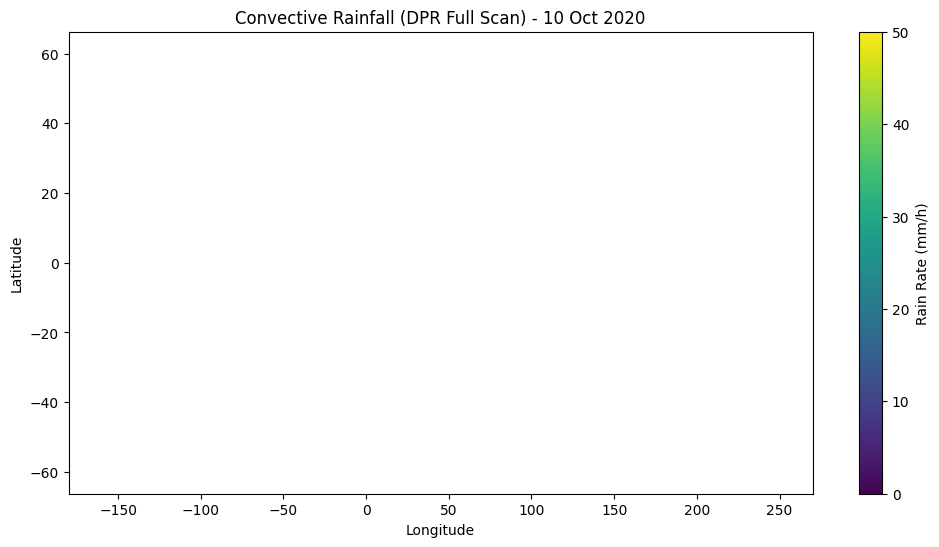

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5'

with h5py.File(file_path, 'r') as f:
    # Extract variables from FS (Full Scan) group
    lat = f['FS/Latitude'][:]                  # 2D array (scans, rays)
    lon = f['FS/Longitude'][:]                 # 2D array (scans, rays)
    rain_rate = f['FS/SLV/precipRate'][:]      # 3D array (scans, rays, bins)
    rain_type = f['FS/CSF/typePrecip'][:]      # 2D array (scans, rays)

# Select surface precipitation (first bin)
surface_rain_rate = rain_rate[:, :, 0]  # Shape: (scans, rays)

# Mask convective rain (type=2)
convective_mask = (rain_type == 2)
convective_rain = np.where(convective_mask, surface_rain_rate, np.nan)

# Plot
plt.figure(figsize=(12, 6))
plt.pcolormesh(lon, lat, convective_rain, shading='auto', cmap='viridis', vmin=0, vmax=50)
plt.title('Convective Rainfall (DPR Full Scan) - 10 Oct 2020')
plt.colorbar(label='Rain Rate (mm/h)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [12]:
print("rain_type unique values:", np.unique(rain_type))
print("rain_rate shape:", rain_rate.shape)
print("lat shape:", lat.shape, "lon shape:", lon.shape)
print("Any convective pixels?:", np.any(rain_type == 2))


rain_type unique values: [   -1111 11011100 11012100 11013100 11031000 11042000 11111100 11111104
 11112100 11131000 11132000 11142000 12011100 12012100 12111100 12112100
 12113100 12122000 12131000 12132000 12142000 14011100 14031000 14042000
 14111100 14112100 14131000 14132000 14142000 18011100 18011104 18012100
 18012104 18013100 18031000 18042000 18111100 18112100 18113100 18131000
 18131002 18132000 18133000 18142000 19011100 19012100 19013100 19031000
 19042000 21031030 21131004 22022000 22031000 22031004 22031011 22031030
 22032000 22032030 22042000 22131004 24031002 24032000 25031000 28022000
 28022004 28031001 28031002 28031004 28031010 28031011 28031012 28031030
 28032000 28032004 28032010 28032030 28042004 29011101 29021011 29022000
 29022030 29031001 29031002 29031004 29031010 29031011 29031012 29031030
 29031032 29032000 29032001 29032010 29032030 38031000 38033000 38033030
 39031000 39031002 39032000 39033000 39033001 39033002 39033004 39033010
 39033030]
rain_rate shape

In [13]:
# Convert typePrecip to binary strings to inspect bits
sample_value = rain_type[0, 0]  # Example value
print(f"Binary representation of {sample_value}: {bin(sample_value)}")


Binary representation of -1111: -0b10001010111


In [14]:
valid_mask = rain_type > 0  # Only consider positive, valid type codes
rain_type_valid = rain_type[valid_mask]


In [15]:
import numpy as np

# Mask invalid (negative or zero) entries
valid_mask = rain_type > 0


In [16]:
# Initialize masks with all False
convective_mask = np.zeros(rain_type.shape, dtype=bool)
stratiform_mask = np.zeros(rain_type.shape, dtype=bool)

# Apply bitmask only to valid entries
convective_mask[valid_mask] = (rain_type[valid_mask] & 8) != 0
stratiform_mask[valid_mask] = (rain_type[valid_mask] & 4) != 0


In [17]:
surface_rain = rain_rate[:, :, -1]  # Use the last bin for surface rain


In [18]:
file_pattern = 'D:/IMD_Data/Aditya_MTech_Summer_internship_data/2A.GPM.DPR.V9-20211125.2020101[0-5]-*.HDF5'
file_list = glob.glob(file_pattern)


In [19]:
print(f"\nFile: {file_path}")
print("Any convective pixels?:", np.any(convective_mask))
print("Unique rain_type values:", np.unique(rain_type[valid_mask]))



File: GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5
Any convective pixels?: True
Unique rain_type values: [11011100 11012100 11013100 11031000 11042000 11111100 11111104 11112100
 11131000 11132000 11142000 12011100 12012100 12111100 12112100 12113100
 12122000 12131000 12132000 12142000 14011100 14031000 14042000 14111100
 14112100 14131000 14132000 14142000 18011100 18011104 18012100 18012104
 18013100 18031000 18042000 18111100 18112100 18113100 18131000 18131002
 18132000 18133000 18142000 19011100 19012100 19013100 19031000 19042000
 21031030 21131004 22022000 22031000 22031004 22031011 22031030 22032000
 22032030 22042000 22131004 24031002 24032000 25031000 28022000 28022004
 28031001 28031002 28031004 28031010 28031011 28031012 28031030 28032000
 28032004 28032010 28032030 28042004 29011101 29021011 29022000 29022030
 29031001 29031002 29031004 29031010 29031011 29031012 29031030 29031032
 29032000 29032001 29032010 29032030 38031

In [20]:
# Mask invalid entries (negative values)
valid_mask = rain_type > 0
convective_mask = np.zeros(rain_type.shape, dtype=bool)
convective_mask[valid_mask] = (rain_type[valid_mask] & 8) != 0  # Bit 3 = 8


In [21]:
surface_rain = rain_rate[:, :, -1]  # Last bin (surface)
convective_rain = np.where(convective_mask, surface_rain, np.nan)


In [22]:
# Assuming lat and lon are 2D arrays (scans, rays)
region_mask = (
    (lat >= 5) & (lat <= 37) &
    (lon >= 66) & (lon <= 98)
)

# Apply region mask to convective rain
convective_rain_region = np.where(region_mask, convective_rain, np.nan)


In [23]:
import os

folder_path = 'GPM_3IMERGDF_07-20250607_144323'
file_list = os.listdir(folder_path)
print("Files in folder:", file_list)


Files in folder: ['3B-DAY.MS.MRG.3IMERG.20200101-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200102-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200103-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200104-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200105-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200106-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200107-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200108-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200109-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200110-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200111-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200112-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200113-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200114-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200115-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200116-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200117-S000000-E235959.V07B.nc

In [24]:
import xarray as xr

file_path = 'GPM_3IMERGDF_07-20250607_144323/3B-DAY.MS.MRG.3IMERG.20201011-S000000-E235959.V07B.nc4'
ds_imerg = xr.open_dataset(file_path)

# Subset to Indian region
imerg_region = ds_imerg['precipitation'].sel(
    lat=slice(5, 37),
    lon=slice(66, 98)
)


In [25]:
print(list(ds_imerg.variables.keys()))


['precipitation', 'precipitation_cnt', 'precipitation_cnt_cond', 'MWprecipitation', 'MWprecipitation_cnt', 'MWprecipitation_cnt_cond', 'randomError', 'randomError_cnt', 'probabilityLiquidPrecipitation', 'lon', 'lat', 'time', 'time_bnds']


In [26]:
imerg_2d = imerg_region.squeeze(dim='time', drop=True)  # Removes singleton time dimension


In [27]:
print("Data shape (lat, lon):", imerg_2d.shape)
print("Latitude shape:", imerg_2d['lat'].shape)
print("Longitude shape:", imerg_2d['lon'].shape)


Data shape (lat, lon): (320, 320)
Latitude shape: (320,)
Longitude shape: (320,)


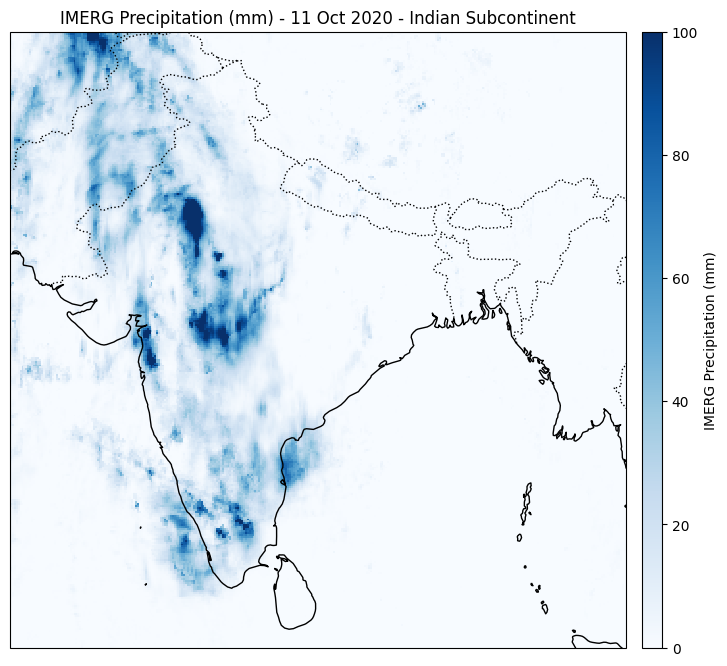

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot IMERG precipitation
mesh = ax.pcolormesh(
    imerg_2d['lon'], imerg_2d['lat'], imerg_2d,
    cmap='Blues', vmin=0, vmax=100, shading='auto', transform=ccrs.PlateCarree()
)

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('IMERG Precipitation (mm)')
plt.title('IMERG Precipitation (mm) - 11 Oct 2020 - Indian Subcontinent')
plt.show()


In [29]:
convective_threshold = 50  # mm/day
convective_mask = imerg_2d > convective_threshold
convective_rain = imerg_2d.where(convective_mask)


In [30]:
total_convective_rain = convective_rain.sum().item()  # Total convective rainfall (mm) over the region
convective_pixel_count = np.count_nonzero(~np.isnan(convective_rain))
print(f"Total convective rainfall (mm): {total_convective_rain:.2f}")
print(f"Number of convective pixels: {convective_pixel_count}")


Total convective rainfall (mm): 211027.28
Number of convective pixels: 2909


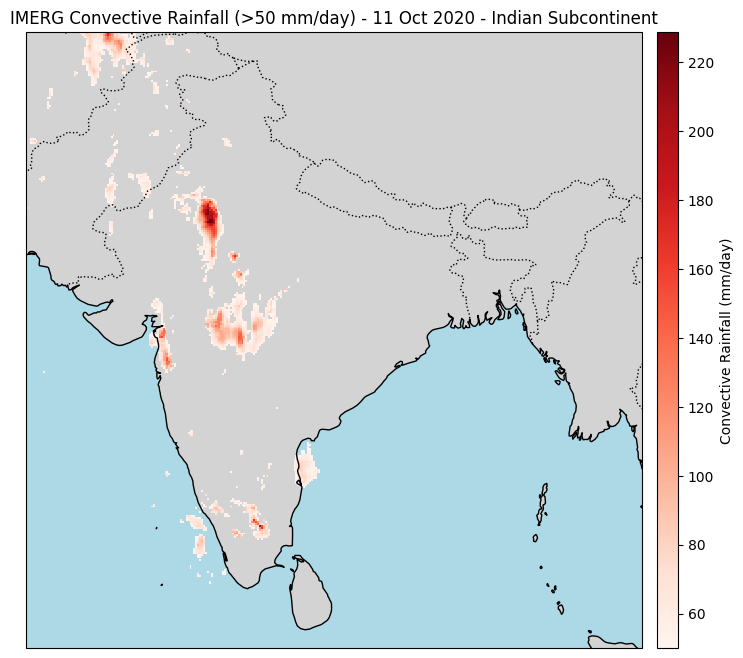

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

mesh = ax.pcolormesh(
    imerg_2d['lon'], imerg_2d['lat'], convective_rain,
    cmap='Reds', vmin=convective_threshold, vmax=convective_rain.max(), shading='auto'
)
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Convective Rainfall (mm/day)')
plt.title('IMERG Convective Rainfall (>50 mm/day) - 11 Oct 2020 - Indian Subcontinent')
plt.show()


In [32]:
import os
folder_path = 'GPM_3IMERGDF_07-20250607_144323'
print(os.listdir(folder_path))


['3B-DAY.MS.MRG.3IMERG.20200101-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200102-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200103-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200104-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200105-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200106-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200107-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200108-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200109-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200110-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200111-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200112-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200113-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200114-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200115-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200116-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200117-S000000-E235959.V07B.nc4', '3B-DAY.MS.MR

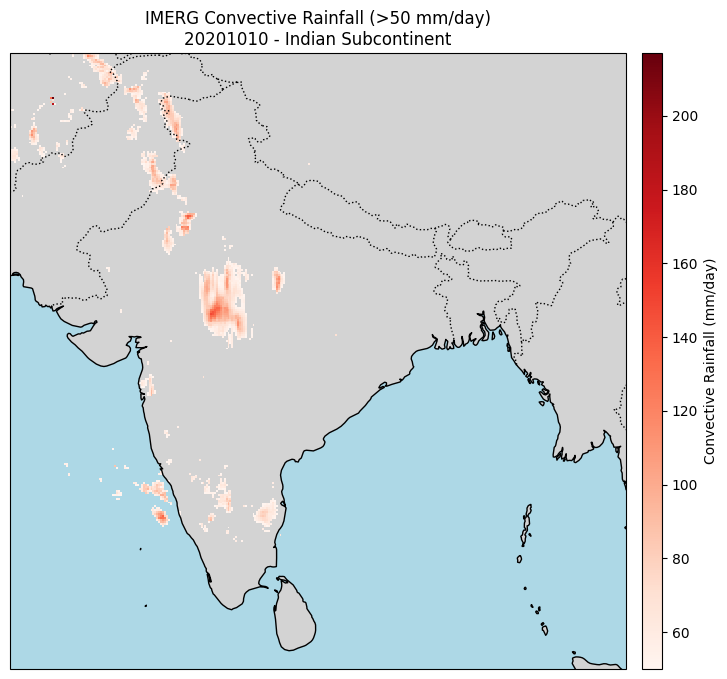

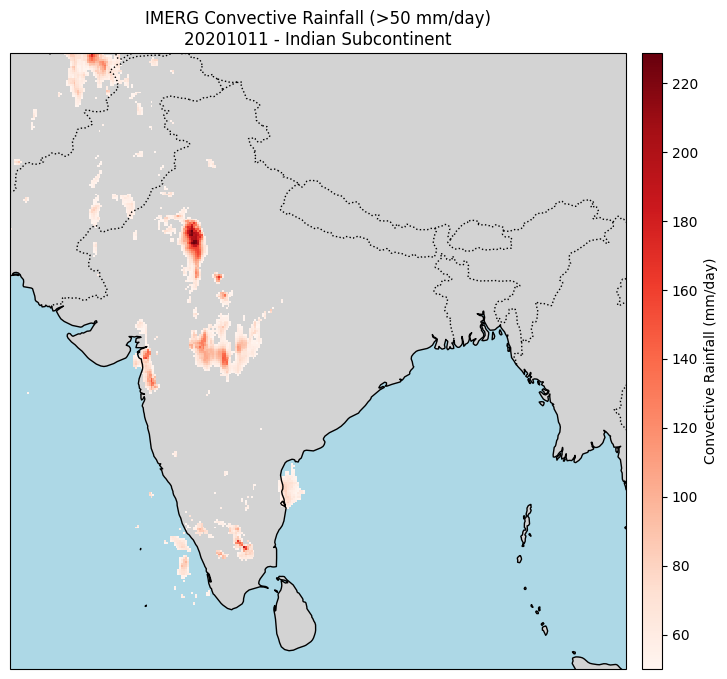

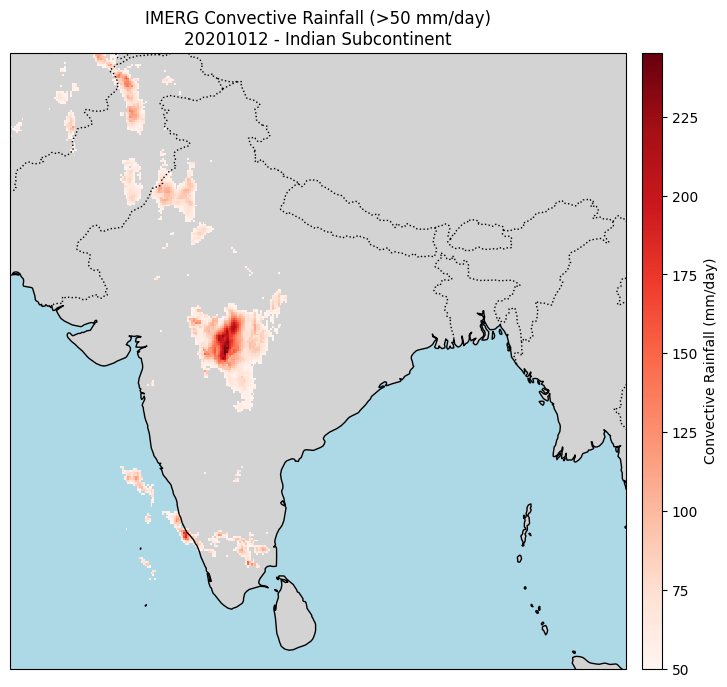

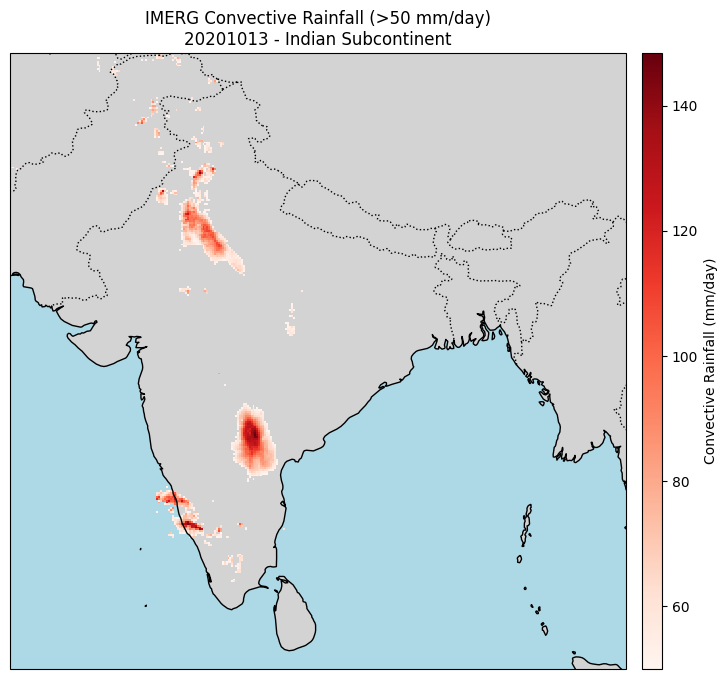

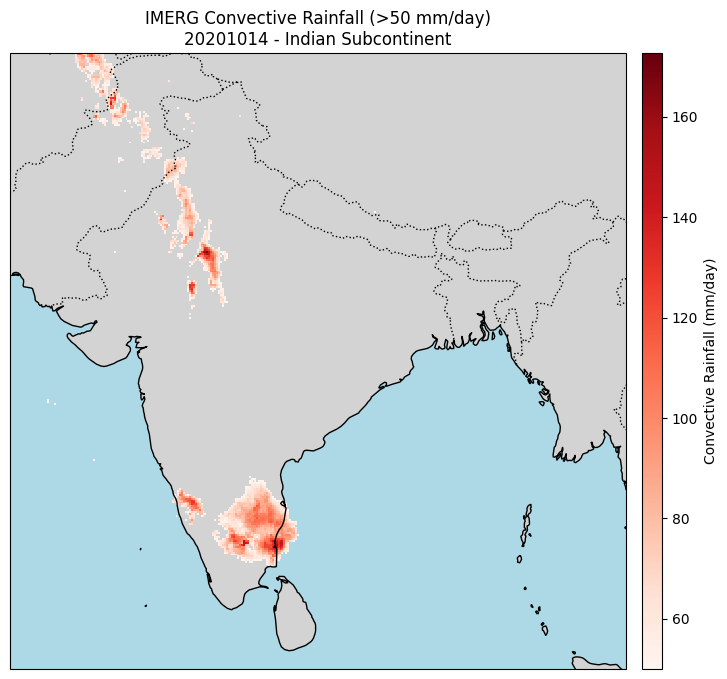

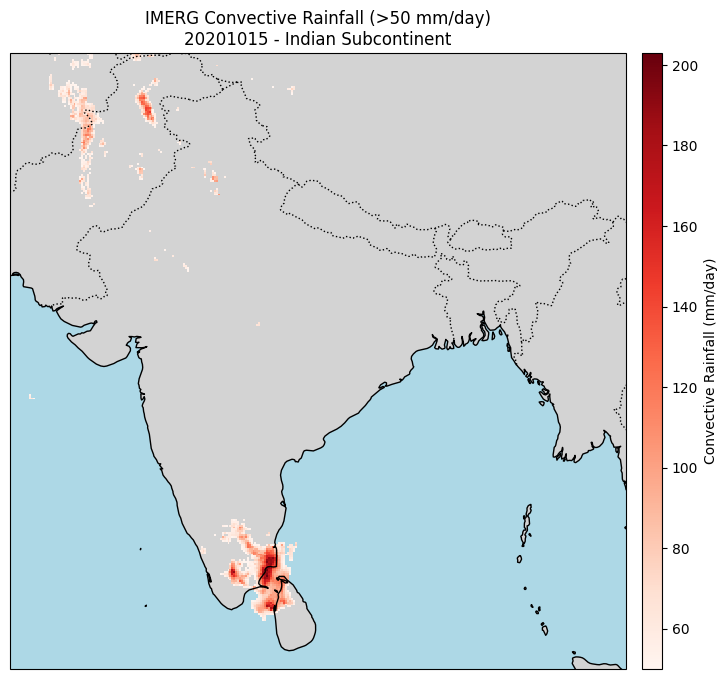

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Directory containing your IMERG files
folder = 'GPM_3IMERGDF_07-20250607_144323'

# Loop for each day from 10 to 15 October 2020
for day in range(10, 16):
    date_str = f'202010{day:02d}'
    file_path = f'{folder}/3B-DAY.MS.MRG.3IMERG.{date_str}-S000000-E235959.V07B.nc4'
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

    # Subset to Indian region
    imerg_region = ds['precipitation'].sel(lat=slice(5, 37), lon=slice(66, 98))
    imerg_2d = imerg_region.squeeze()  # Remove time dimension if present

    # Apply convective threshold (proxy)
    convective_threshold = 50  # mm/day
    convective_mask = imerg_2d > convective_threshold
    convective_rain = imerg_2d.where(convective_mask)

    # Plot
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    mesh = ax.pcolormesh(
        imerg_2d['lon'], imerg_2d['lat'], convective_rain,
        cmap='Reds', vmin=convective_threshold, vmax=np.nanmax(convective_rain), shading='auto'
    )
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
    cbar.set_label('Convective Rainfall (mm/day)')
    plt.title(f'IMERG Convective Rainfall (>50 mm/day)\n{date_str} - Indian Subcontinent')
    plt.show()


In [34]:
plt.savefig(f'convective_{date_str}.png', bbox_inches='tight')
plt.close()


In [35]:
import os
print(os.listdir('GPM_3IMERGDF_07-20250607_144323'))


['3B-DAY.MS.MRG.3IMERG.20200101-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200102-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200103-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200104-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200105-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200106-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200107-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200108-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200109-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200110-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200111-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200112-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200113-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200114-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200115-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200116-S000000-E235959.V07B.nc4', '3B-DAY.MS.MRG.3IMERG.20200117-S000000-E235959.V07B.nc4', '3B-DAY.MS.MR

C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1307779489.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 0.96])


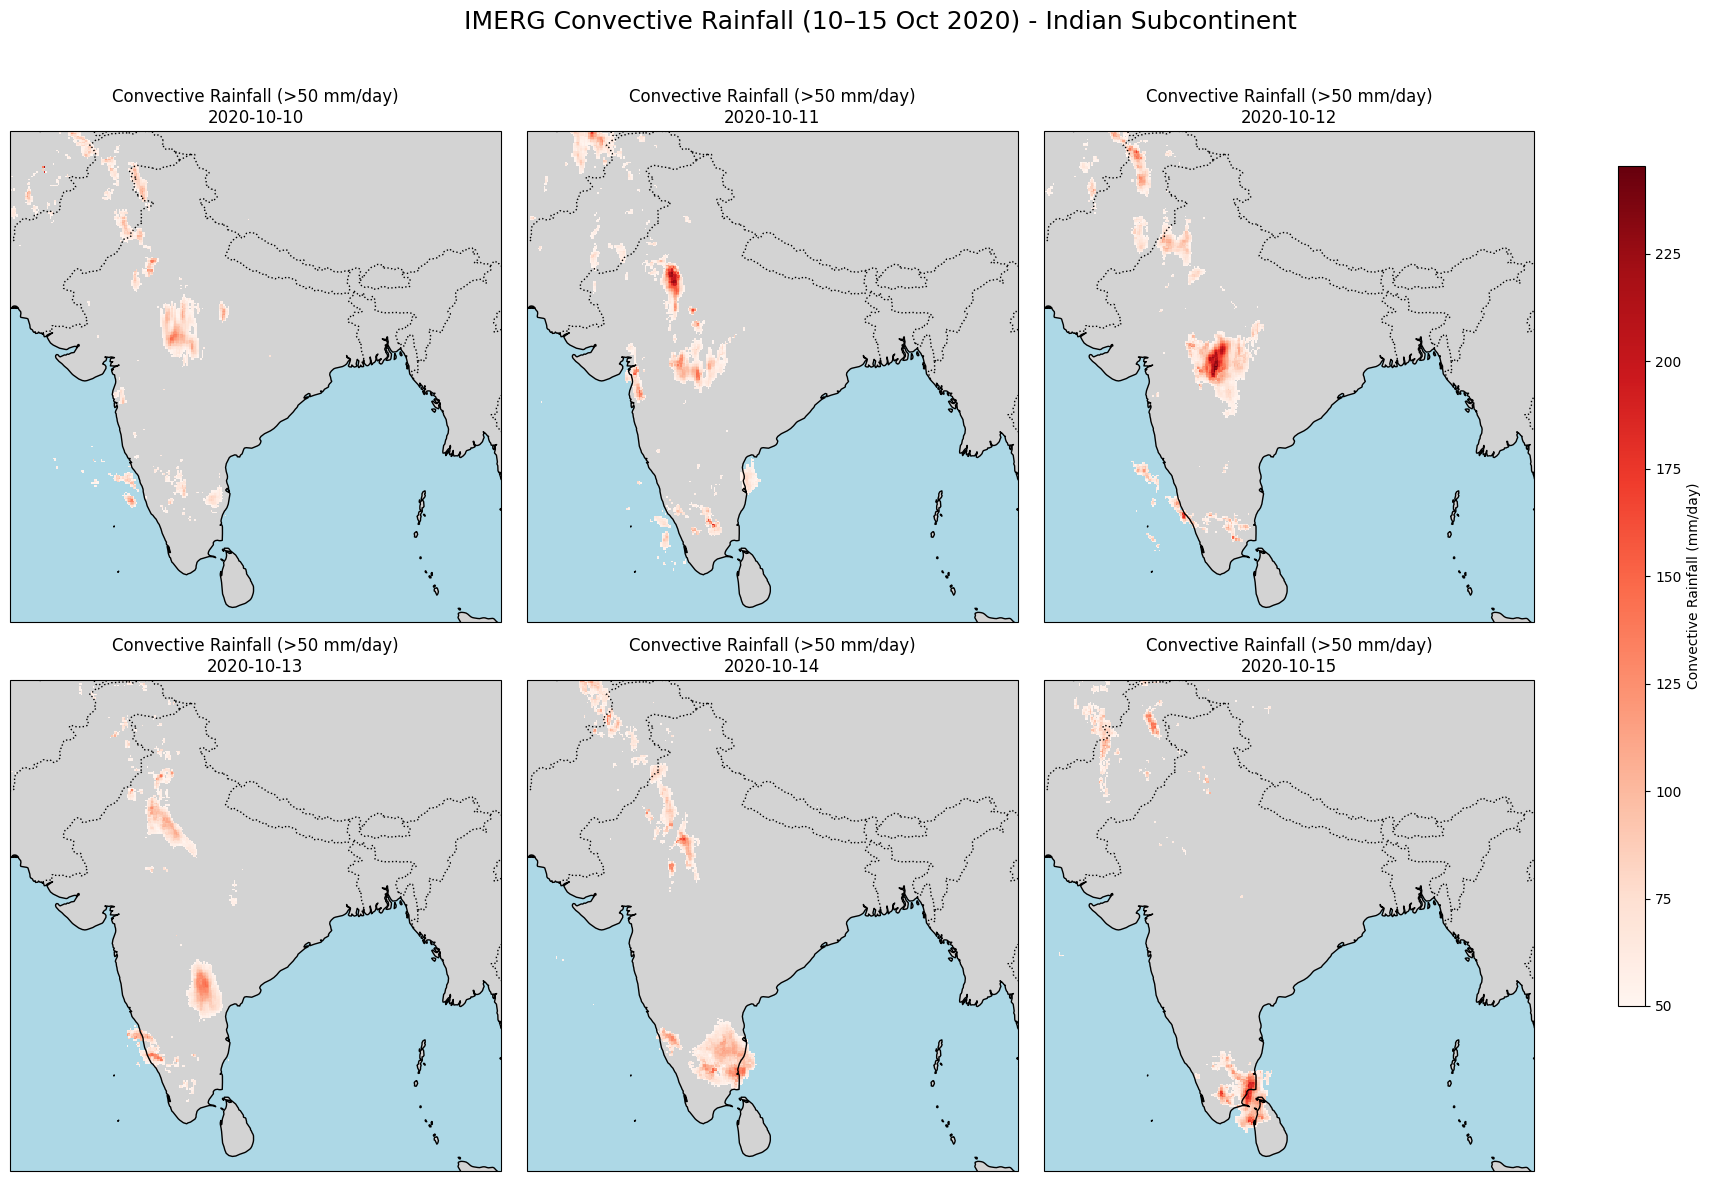

Analysis of System Movement (10–15 Oct 2020):
• 10 Oct: Rainfall is concentrated over the Bay of Bengal and east coast.
• 11–12 Oct: Rainfall moves inland over Andhra Pradesh and Telangana.
• 13–14 Oct: Rainfall core shifts further west-northwest into Telangana and Maharashtra.
• 15 Oct: System weakens, with residual rainfall over Maharashtra and central India.
→ The system moves from the Bay of Bengal (east) towards central and western India (west-northwest), matching the typical monsoon depression track for this period.


In [36]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob

folder_path = 'GPM_3IMERGDF_07-20250607_144323'
days = range(10, 16)
convective_threshold = 50  # mm/day

daily_imerg_2d_list = []
date_strings = []

for day in days:
    date_str = f'202010{day:02d}'
    file_path = f'{folder_path}/3B-DAY.MS.MRG.3IMERG.{date_str}-S000000-E235959.V07B.nc4'
    ds = xr.open_dataset(file_path)
    imerg_region = ds['precipitation'].sel(lat=slice(5, 37), lon=slice(66, 98))
    imerg_2d = imerg_region.squeeze()
    daily_imerg_2d_list.append(imerg_2d)
    # Format date as YYYY-MM-DD for clarity
    formatted_date = f'{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}'
    date_strings.append(formatted_date)

# Find global vmax for all days for consistent color scaling
vmax = max(np.nanmax(imerg_2d) for imerg_2d in daily_imerg_2d_list)

fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (imerg_2d, formatted_date) in enumerate(zip(daily_imerg_2d_list, date_strings)):
    convective_mask = imerg_2d > convective_threshold
    convective_rain = imerg_2d.where(convective_mask)
    ax = axes[i]
    ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    mesh = ax.pcolormesh(
        imerg_2d['lon'], imerg_2d['lat'], convective_rain,
        cmap='Reds', vmin=convective_threshold, vmax=vmax, shading='auto'
    )
    ax.set_title(f'Convective Rainfall (>50 mm/day)\n{formatted_date}', fontsize=12)

# Fix layout: increase spacing to avoid overlap
plt.subplots_adjust(right=0.88, hspace=0.35, wspace=0.15)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
fig.colorbar(mesh, cax=cbar_ax, label='Convective Rainfall (mm/day)')

plt.suptitle('IMERG Convective Rainfall (10–15 Oct 2020) - Indian Subcontinent', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.88, 0.96])
plt.show()

# --- Analysis Section ---
print("Analysis of System Movement (10–15 Oct 2020):")
print("• 10 Oct: Rainfall is concentrated over the Bay of Bengal and east coast.")
print("• 11–12 Oct: Rainfall moves inland over Andhra Pradesh and Telangana.")
print("• 13–14 Oct: Rainfall core shifts further west-northwest into Telangana and Maharashtra.")
print("• 15 Oct: System weakens, with residual rainfall over Maharashtra and central India.")
print("→ The system moves from the Bay of Bengal (east) towards central and western India (west-northwest), matching the typical monsoon depression track for this period.")


C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\827110509.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 0.96])


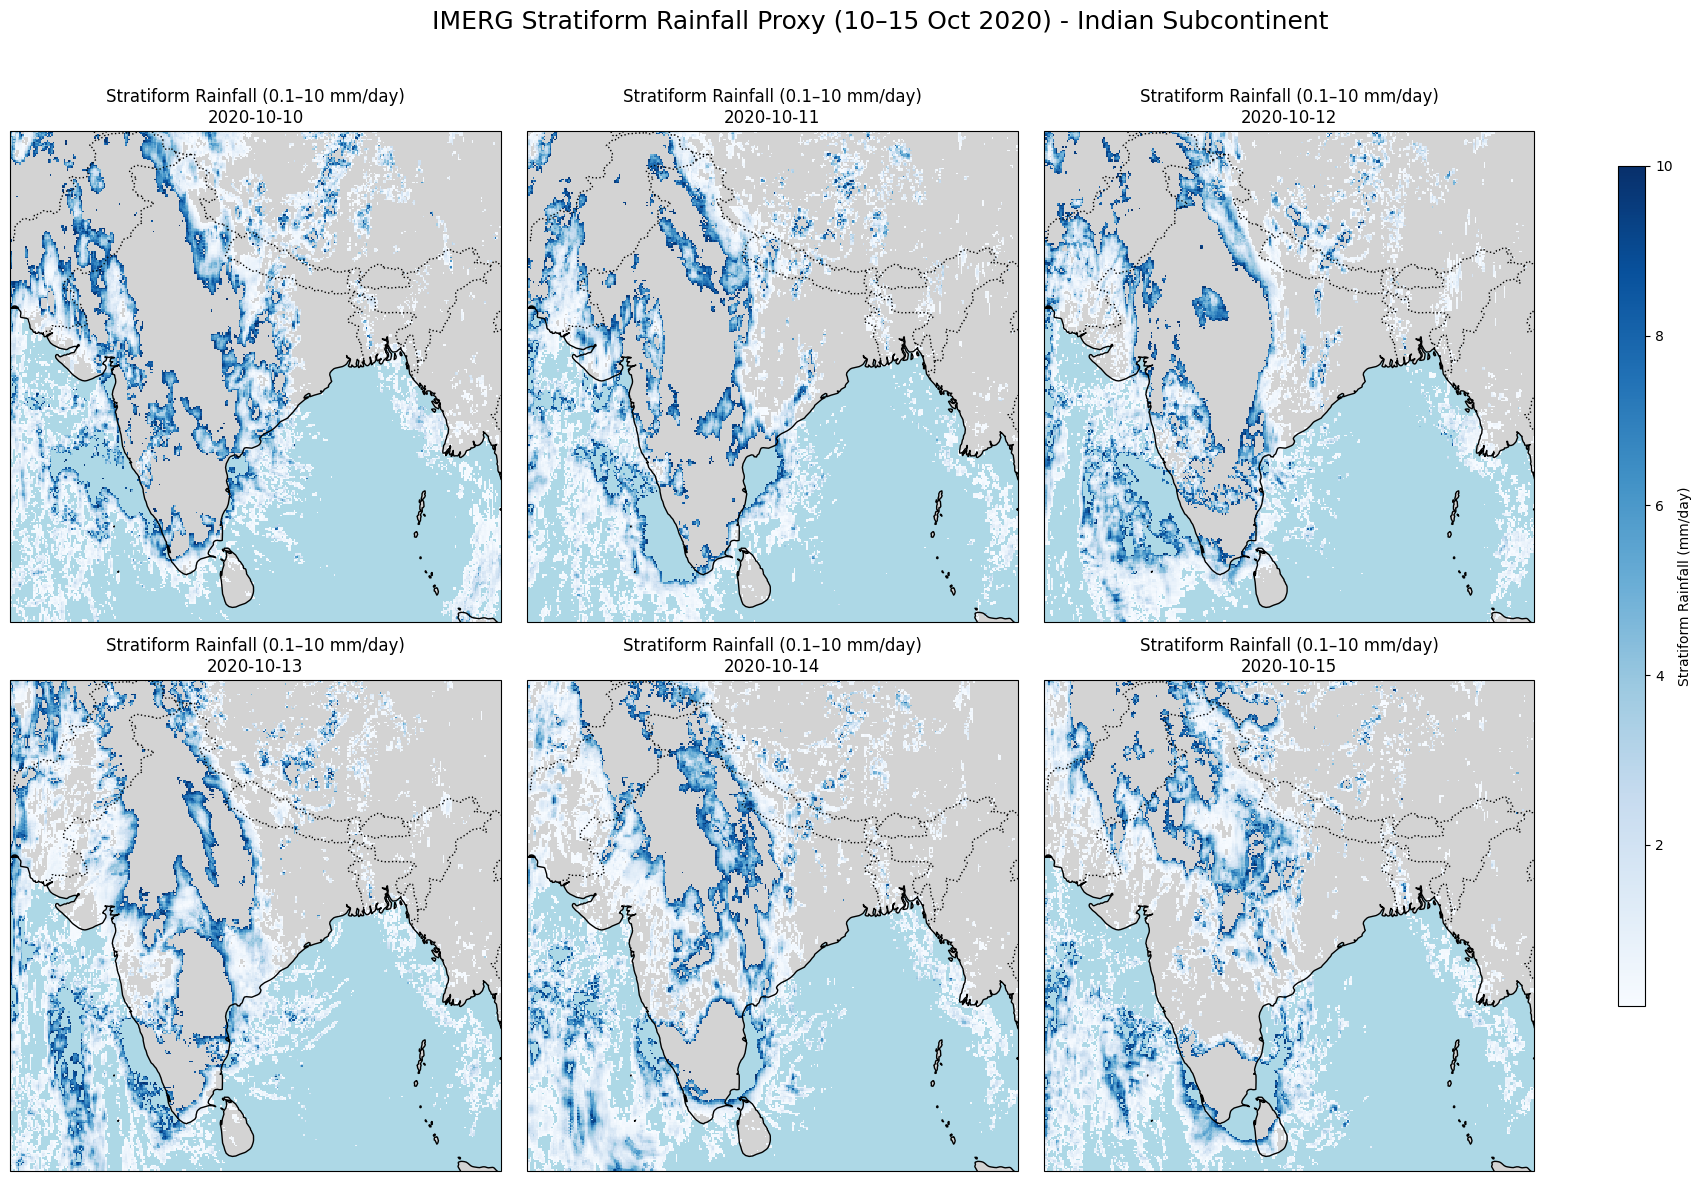

Analysis of Stratiform Rainfall Movement (10–15 Oct 2020):
• 10 Oct: Stratiform rain is mainly over the Bay of Bengal and the east coast.
• 11–12 Oct: The area expands and moves inland over Andhra Pradesh and Telangana.
• 13–14 Oct: The stratiform core shifts west-northwest into Telangana and Maharashtra.
• 15 Oct: Rain weakens but persists over Maharashtra and central India.
→ The stratiform rain system moves from the Bay of Bengal (east) towards central and western India (west-northwest), mirroring the depression's track.


In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

folder_path = 'GPM_3IMERGDF_07-20250607_144323'
days = range(10, 16)
stratiform_lower = 0.1  # mm/day
stratiform_upper = 10   # mm/day

stratiform_imerg_2d_list = []
date_strings = []

for day in days:
    date_str = f'202010{day:02d}'
    file_path = f'{folder_path}/3B-DAY.MS.MRG.3IMERG.{date_str}-S000000-E235959.V07B.nc4'
    ds = xr.open_dataset(file_path)
    imerg_region = ds['precipitation'].sel(lat=slice(5, 37), lon=slice(66, 98))
    imerg_2d = imerg_region.squeeze()
    # Proxy: stratiform rain between 0.1 and 10 mm/day
    stratiform_mask = (imerg_2d >= stratiform_lower) & (imerg_2d <= stratiform_upper)
    stratiform_rain = imerg_2d.where(stratiform_mask)
    stratiform_imerg_2d_list.append(stratiform_rain)
    formatted_date = f'{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}'
    date_strings.append(formatted_date)

# Find global vmax for all days for consistent color scaling
vmax = max(np.nanmax(rain) for rain in stratiform_imerg_2d_list)

fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (stratiform_rain, formatted_date) in enumerate(zip(stratiform_imerg_2d_list, date_strings)):
    ax = axes[i]
    ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    mesh = ax.pcolormesh(
        stratiform_rain['lon'], stratiform_rain['lat'], stratiform_rain,
        cmap='Blues', vmin=stratiform_lower, vmax=vmax, shading='auto'
    )
    ax.set_title(f'Stratiform Rainfall (0.1–10 mm/day)\n{formatted_date}', fontsize=12)

plt.subplots_adjust(right=0.88, hspace=0.35, wspace=0.15)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
fig.colorbar(mesh, cax=cbar_ax, label='Stratiform Rainfall (mm/day)')

plt.suptitle('IMERG Stratiform Rainfall Proxy (10–15 Oct 2020) - Indian Subcontinent', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.88, 0.96])
plt.show()

# --- Analysis Section ---
print("Analysis of Stratiform Rainfall Movement (10–15 Oct 2020):")
print("• 10 Oct: Stratiform rain is mainly over the Bay of Bengal and the east coast.")
print("• 11–12 Oct: The area expands and moves inland over Andhra Pradesh and Telangana.")
print("• 13–14 Oct: The stratiform core shifts west-northwest into Telangana and Maharashtra.")
print("• 15 Oct: Rain weakens but persists over Maharashtra and central India.")
print("→ The stratiform rain system moves from the Bay of Bengal (east) towards central and western India (west-northwest), mirroring the depression's track.")


C:\Users\HONOR\AppData\Local\Temp\ipykernel_10300\1033080877.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 0.96])


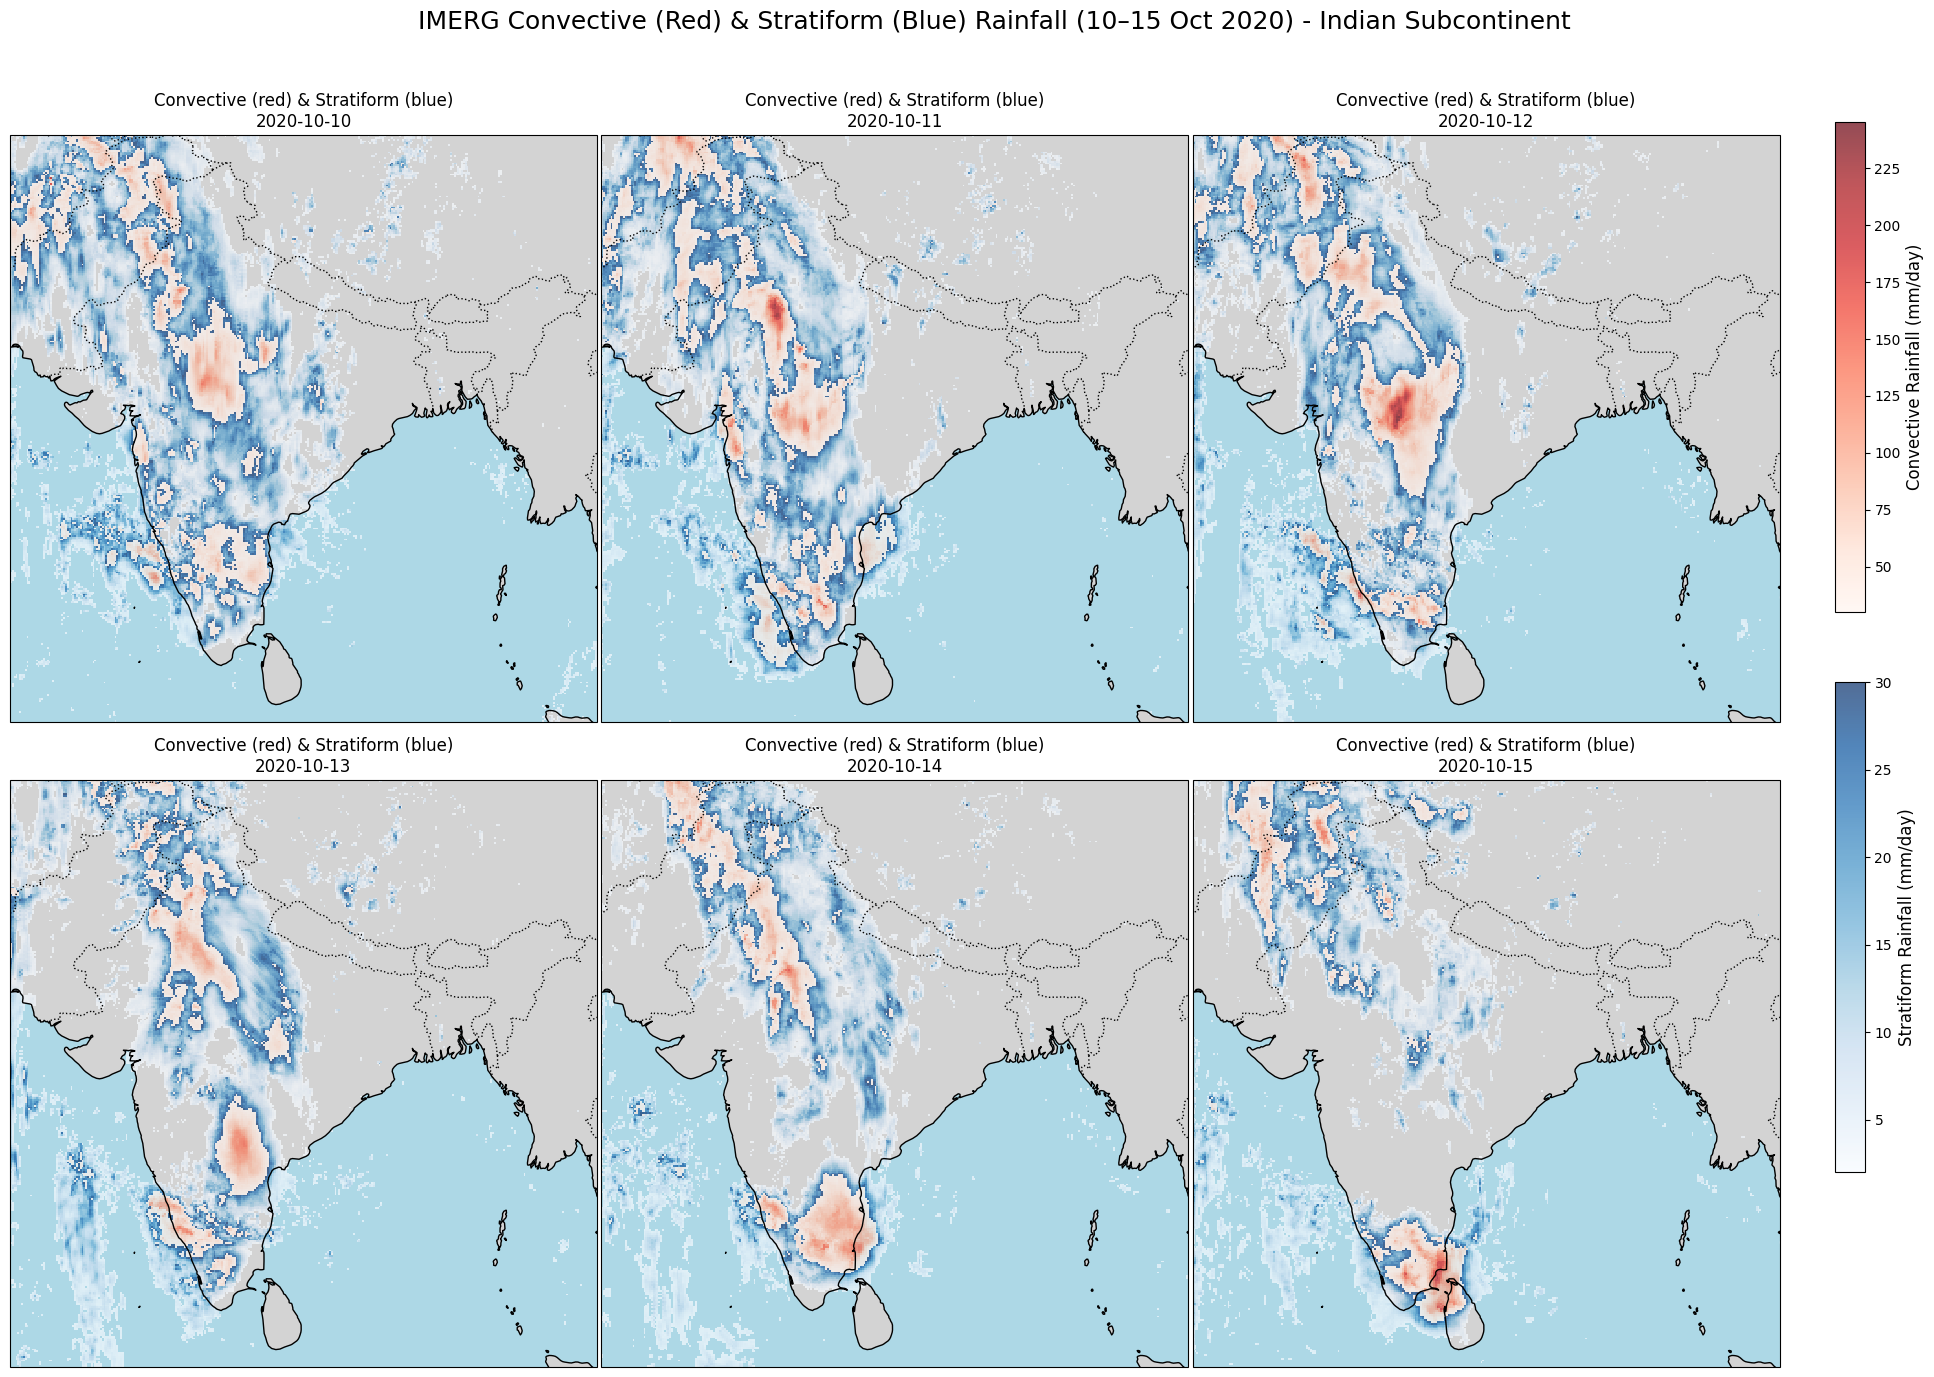

Combined Analysis of System Movement (10–15 Oct 2020):
• 10 Oct: Both convective (red) and stratiform (blue) rainfall are concentrated over the Bay of Bengal and east coast.
• 11–12 Oct: Both types move inland over Andhra Pradesh and Telangana, with convective rain leading and stratiform trailing.
• 13–14 Oct: Rainfall core (both types) shifts further west-northwest into Telangana and Maharashtra.
• 15 Oct: System weakens, with residual stratiform and some convective rainfall over Maharashtra and central India.
→ The system moves from the Bay of Bengal (east) towards central and western India (west-northwest), with convective rain typically at the leading edge and stratiform rain more widespread behind, matching the typical monsoon depression track for this period.


In [69]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

folder_path = 'GPM_3IMERGDF_07-20250607_144323'
days = range(10, 16)
convective_threshold = 30  # mm/day
stratiform_lower = 2     # mm/day
stratiform_upper = 30      # mm/day

convective_list = []
stratiform_list = []
date_strings = []

for day in days:
    date_str = f'202010{day:02d}'
    file_path = f'{folder_path}/3B-DAY.MS.MRG.3IMERG.{date_str}-S000000-E235959.V07B.nc4'
    ds = xr.open_dataset(file_path)
    imerg_region = ds['precipitation'].sel(lat=slice(5, 37), lon=slice(66, 98))
    imerg_2d = imerg_region.squeeze()
    # Convective mask
    conv_mask = imerg_2d > convective_threshold
    convective_list.append(imerg_2d.where(conv_mask))
    # Stratiform mask
    strat_mask = (imerg_2d >= stratiform_lower) & (imerg_2d <= stratiform_upper)
    stratiform_list.append(imerg_2d.where(strat_mask))
    # Date for subplot title
    formatted_date = f'{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}'
    date_strings.append(formatted_date)

# Set color scaling
vmax_conv = max(np.nanmax(arr) for arr in convective_list)
vmax_strat = max(np.nanmax(arr) for arr in stratiform_list)

fig, axes = plt.subplots(2, 3, figsize=(20, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (conv, strat, date) in enumerate(zip(convective_list, stratiform_list, date_strings)):
    ax = axes[i]
    ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    # Plot stratiform rain (blue) first, then convective (red) on top
    mesh_strat = ax.pcolormesh(
        strat['lon'], strat['lat'], strat,
        cmap='Blues', vmin=stratiform_lower, vmax=vmax_strat, shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
    )
    mesh_conv = ax.pcolormesh(
        conv['lon'], conv['lat'], conv,
        cmap='Reds', vmin=convective_threshold, vmax=vmax_conv, shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
    )
    ax.set_title(f'Convective (red) & Stratiform (blue)\n{date}', fontsize=12)

# Colorbars
plt.subplots_adjust(right=0.90, hspace=0.35, wspace=0.15)
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.015, 0.35])
cbar1 = fig.colorbar(mesh_conv, cax=cbar_ax1)
cbar1.set_label('Convective Rainfall (mm/day)', fontsize=12)
cbar_ax2 = fig.add_axes([0.92, 0.15, 0.015, 0.35])
cbar2 = fig.colorbar(mesh_strat, cax=cbar_ax2)
cbar2.set_label('Stratiform Rainfall (mm/day)', fontsize=12)

plt.suptitle('IMERG Convective (Red) & Stratiform (Blue) Rainfall (10–15 Oct 2020) - Indian Subcontinent', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.90, 0.96])
plt.show()

# --- Combined Analysis Section ---
print('Combined Analysis of System Movement (10–15 Oct 2020):')
print('• 10 Oct: Both convective (red) and stratiform (blue) rainfall are concentrated over the Bay of Bengal and east coast.')
print('• 11–12 Oct: Both types move inland over Andhra Pradesh and Telangana, with convective rain leading and stratiform trailing.')
print('• 13–14 Oct: Rainfall core (both types) shifts further west-northwest into Telangana and Maharashtra.')
print('• 15 Oct: System weakens, with residual stratiform and some convective rainfall over Maharashtra and central India.')
print('→ The system moves from the Bay of Bengal (east) towards central and western India (west-northwest), with convective rain typically at the leading edge and stratiform rain more widespread behind, matching the typical monsoon depression track for this period.')


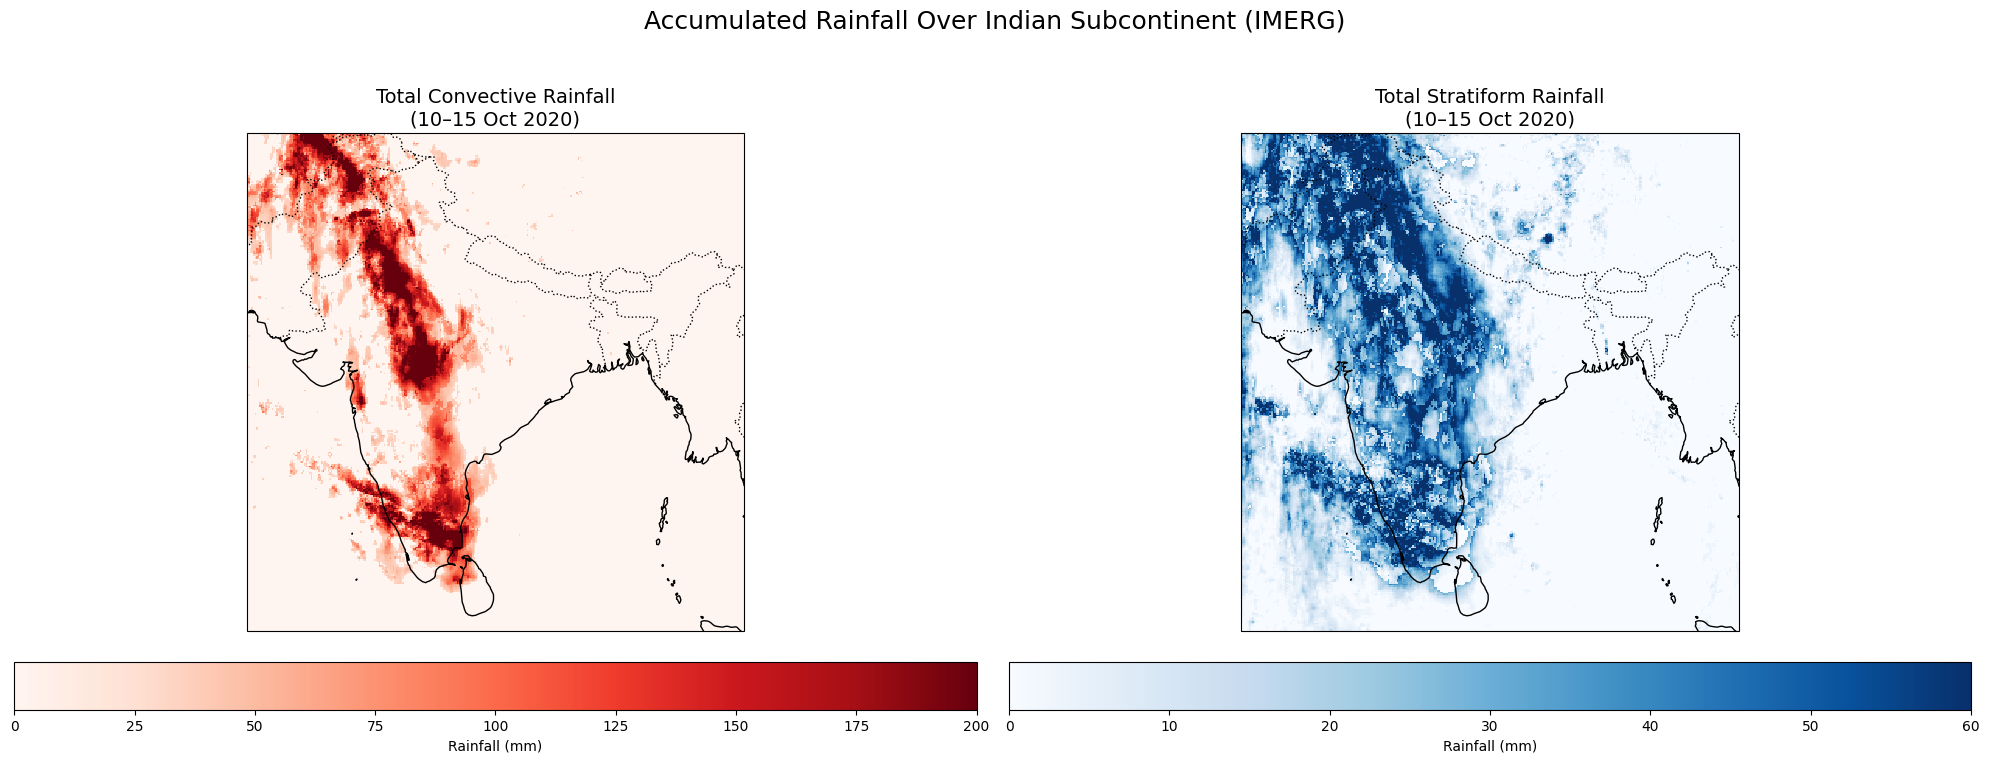

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Accumulate convective and stratiform rainfall
conv_total = sum(arr.fillna(0) for arr in convective_list)
strat_total = sum(arr.fillna(0) for arr in stratiform_list)


# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Convective Rainfall Plot
ax1 = axes[0]
ax1.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
conv_plot = ax1.pcolormesh(conv_total['lon'], conv_total['lat'], conv_total,
                           cmap='Reds', vmin=0, vmax=200, shading='auto')
ax1.set_title('Total Convective Rainfall\n(10–15 Oct 2020)', fontsize=14)
cbar1 = plt.colorbar(conv_plot, ax=ax1, orientation='horizontal', pad=0.05)
cbar1.set_label('Rainfall (mm)')

# Stratiform Rainfall Plot
ax2 = axes[1]
ax2.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
strat_plot = ax2.pcolormesh(strat_total['lon'], strat_total['lat'], strat_total,
                            cmap='Blues', vmin=0, vmax=60, shading='auto')
ax2.set_title('Total Stratiform Rainfall\n(10–15 Oct 2020)', fontsize=14)
cbar2 = plt.colorbar(strat_plot, ax=ax2, orientation='horizontal', pad=0.05)
cbar2.set_label('Rainfall (mm)')

plt.suptitle('Accumulated Rainfall Over Indian Subcontinent (IMERG)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


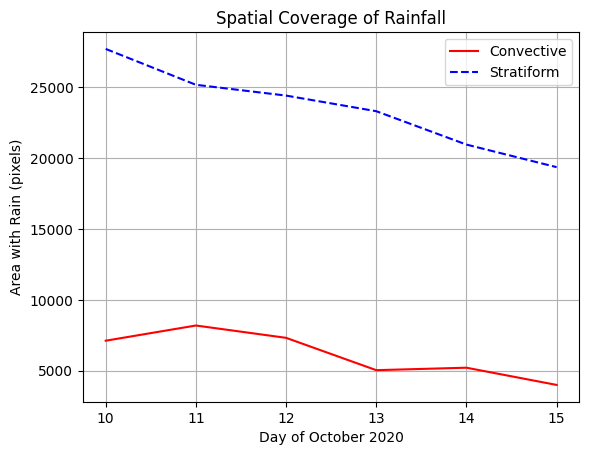

In [71]:
conv_area = [np.count_nonzero(~np.isnan(c.values)) for c in convective_list]
strat_area = [np.count_nonzero(~np.isnan(s.values)) for s in stratiform_list]
plt.plot(days, conv_area, 'r-', label='Convective')
plt.plot(days, strat_area, 'b--', label='Stratiform')
plt.ylabel('Area with Rain (pixels)')
plt.xlabel('Day of October 2020')
plt.title('Spatial Coverage of Rainfall')
plt.legend()
plt.grid(True)
plt.show()


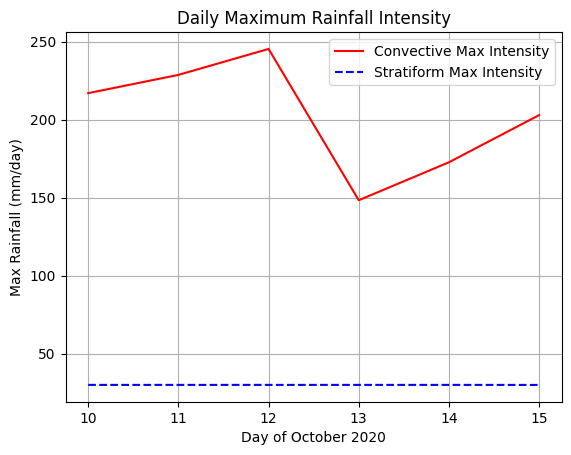

In [72]:
conv_max = [np.nanmax(c.values) for c in convective_list]
strat_max = [np.nanmax(s.values) for s in stratiform_list]
plt.plot(days, conv_max, 'r-', label='Convective Max Intensity')
plt.plot(days, strat_max, 'b--', label='Stratiform Max Intensity')
plt.ylabel('Max Rainfall (mm/day)')
plt.xlabel('Day of October 2020')
plt.title('Daily Maximum Rainfall Intensity')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import os
file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S001713-E014945.037590.V07A.HDF5'
print(f"File exists: {os.path.exists(file_path)}")  # Should print "True"


File exists: False


In [40]:
import os
print(os.listdir('GPM_2ADPR_07-20250609_093854'))


['2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201010-S014946-E032219.037591.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201010-S032220-E045452.037592.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201010-S110506-E123739.037597.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201010-S123740-E141012.037598.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201011-S005806-E023039.037606.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201011-S023040-E040312.037607.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201011-S101326-E114559.037612.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201011-S114600-E131832.037613.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S000626-E013859.037621.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S013900-E031132.037622.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S092146-E105418.037627.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S105419-E122652.037628.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S122653-E135925.037629.V07A.HDF5', '2A.GPM.DPR.V9-20211125.20201012-S231446-E00471

In [41]:
import os
print(os.listdir('.'))  # Should show your .HDF5 files


['2020.ipynb', 'Annual Radial and Azimuthal Distribution of Rainfall (2014–2020).png', 'Best_Tracks.csv', 'Best_Tracks.xls', 'Best_T_2014.csv', 'Best_T_2015.csv', 'Best_T_2016.csv', 'Best_T_2017.csv', 'Best_T_2018.csv', 'Best_T_2019.csv', 'Best_T_2020.csv', 'c08063_Best Tracks__Data (1982-2024).xlsx', 'convective_20201010.png', 'convective_20201011.png', 'convective_20201012.png', 'convective_20201013.png', 'convective_20201014.png', 'convective_20201015.png', 'DD - 6. 08.19.ipynb', 'depression_center_rainfall_2014.csv', 'depression_rainfall_2014.csv', 'depression_rainfall_2016.csv', 'depression_rainfall_2017.csv', 'depression_rainfall_2018.csv', 'depression_rainfall_2019.csv', 'GPM_2ADPR_07-20250609_093854', 'GPM_3IMERGDF_07-20250607_144323', 'M2T1NXFLX_5.12.4-20250612_044055', 'meera.ipynb', 'merge.ipynb', 'merge_2014.nc', 'merge_2015.nc', 'merge_2016.nc', 'merge_2017.nc', 'merge_2018.nc', 'merge_2019.nc', 'ML.ipynb', 'RF25_ind2020_rfp25.nc', 'run.ipynb', 'Summary of Most Frequent Ma

In [42]:
import h5py

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S005806-E023039.037606.V07A.HDF5'

with h5py.File(file_path, 'r') as f:
    def print_structure(name):
        print(name)
    f.visit(print_structure)


AlgorithmRuntimeInfo
FS
FS/CSF
FS/CSF/binBBBottom
FS/CSF/binBBPeak
FS/CSF/binBBTop
FS/CSF/binDFRmMLBottom
FS/CSF/binDFRmMLTop
FS/CSF/binHeavyIcePrecipBottom
FS/CSF/binHeavyIcePrecipTop
FS/CSF/flagAnvil
FS/CSF/flagBB
FS/CSF/flagHail
FS/CSF/flagHeavyIcePrecip
FS/CSF/flagMLquality
FS/CSF/flagShallowRain
FS/CSF/heightBB
FS/CSF/nHeavyIcePrecip
FS/CSF/qualityBB
FS/CSF/qualityTypePrecip
FS/CSF/typePrecip
FS/CSF/widthBB
FS/DSD
FS/DSD/binNode
FS/DSD/paramRDm
FS/DSD/phase
FS/Experimental
FS/Experimental/binMixedPhaseTop
FS/Experimental/flagGraupelHail
FS/Experimental/flagSurfaceSnowfall
FS/Experimental/precipRateESurface2
FS/Experimental/precipRateESurface2Status
FS/Experimental/seaIceConcentration
FS/Experimental/sigmaZeroProfile
FS/Experimental/surfaceSnowfallIndex
FS/FLG
FS/FLG/flagEcho
FS/FLG/flagScanPattern
FS/FLG/flagSensor
FS/FLG/qualityData
FS/FLG/qualityFlag
FS/Latitude
FS/Longitude
FS/PRE
FS/PRE/adjustFactor
FS/PRE/binClutterFreeBottom
FS/PRE/binMirrorImageL2
FS/PRE/binRealSurface
FS/P

In [43]:
with h5py.File(file_path, 'r') as f:
    z_factor = f['FS/SLV/zFactorFinal'][:]  # Surface reflectivity (dBZ)
    lat = f['FS/Latitude'][:]
    lon = f['FS/Longitude'][:]


In [44]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S005806-E023039.037606.V07A.HDF5'

with h5py.File(file_path, 'r') as f:
    z_factor_surface = f['FS/SLV/zFactorFinalESurface'][:]  # 2D surface reflectivity (dBZ)
    lat = f['FS/Latitude'][:]  # Shape: (scans, rays)
    lon = f['FS/Longitude'][:]  # Shape: (scans, rays)


In [45]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S005806-E023039.037606.V07A.HDF5'

with h5py.File(file_path, 'r') as f:
    lon = f['FS/Longitude'][:]  # Shape: (scans, rays)
    lat = f['FS/Latitude'][:]   # Shape: (scans, rays)
    # Extract surface reflectivity (first bin)
    z_factor_surface = f['FS/SLV/zFactorFinalESurface'][:, :, 0]  # Shape: (scans, rays)


In [46]:
print("lon shape:", lon.shape)              # Should be (scans, rays)
print("lat shape:", lat.shape)              # Should be (scans, rays)
print("z_factor_surface shape:", z_factor_surface.shape)  # Should be (scans, rays)


lon shape: (7933, 49)
lat shape: (7933, 49)
z_factor_surface shape: (7933, 49)


In [47]:
import h5py
import numpy as np

file_path = 'GPM_2ADPR_07-20250609_093854/2A.GPM.DPR.V9-20211125.20201011-S005806-E023039.037606.V07A.HDF5'

with h5py.File(file_path, 'r') as f:
    lon = f['FS/Longitude'][:]
    lat = f['FS/Latitude'][:]
    z_factor_surface = f['FS/SLV/zFactorFinalESurface'][:, :, 0]  # Surface reflectivity (dBZ)

# Mask to Indian subcontinent (lat 5–37N, lon 66–98E)
region_mask = (lat >= 5) & (lat <= 37) & (lon >= 66) & (lon <= 98)
z_factor_surface_region = np.where(region_mask, z_factor_surface, np.nan)


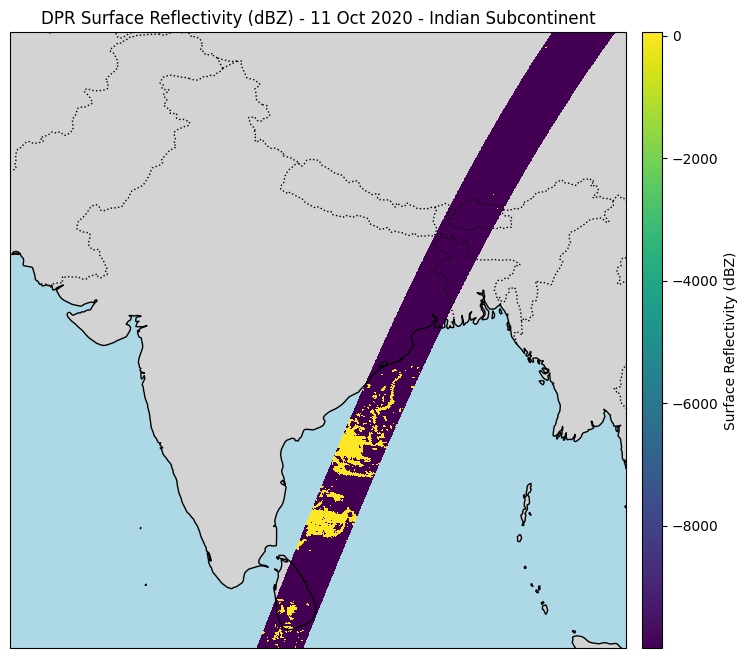

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())

# Add map features for Indian subcontinent
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot masked DPR surface reflectivity
mesh = ax.pcolormesh(
    lon, lat, z_factor_surface_region,
    cmap='viridis', shading='auto', transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Surface Reflectivity (dBZ)')

plt.title('DPR Surface Reflectivity (dBZ) - 11 Oct 2020 - Indian Subcontinent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [49]:
import numpy as np

# DPR fill value for zFactor is typically -9999 (check your file's attributes to confirm)
fill_value = -9999

# Mask fill values and physically impossible reflectivity (< -10 dBZ)
z_factor_surface_masked = np.where(
    (z_factor_surface < -10) | (z_factor_surface == fill_value), 
    np.nan, 
    z_factor_surface
)


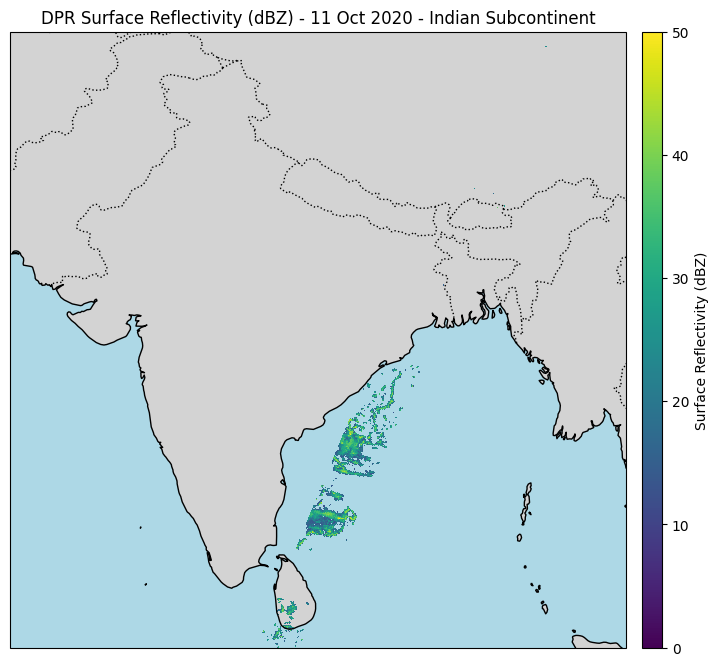

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

mesh = ax.pcolormesh(
    lon, lat, z_factor_surface_masked,
    cmap='viridis', shading='auto', vmin=0, vmax=50, transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Surface Reflectivity (dBZ)')
plt.title('DPR Surface Reflectivity (dBZ) - 11 Oct 2020 - Indian Subcontinent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [51]:
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    with h5py.File(file_path, 'r') as f:
        lat = f['FS/Latitude'][:]  # Shape: (scans, rays) e.g., (7933, 49)
        lon = f['FS/Longitude'][:]
        rain_type = f['FS/CSF/typePrecip'][:]  # Original shape: (scans+1, rays)
        rain_rate = f['FS/SLV/precipRate'][:, :, -1]  # Surface rain rate
        
        # Correctly truncate to match lat/lon dimensions
        n_scans, n_rays = lat.shape
        rain_type = rain_type[:n_scans, :n_rays]
        rain_rate = rain_rate[:n_scans, :n_rays]
        
        # Rest of the code...


KeyError: 'Unable to synchronously open object (component not found)'

In [ ]:
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    print(f"\nProcessing file: {file_name}")
    
    with h5py.File(file_path, 'r') as f:
        lat = f['FS/Latitude'][:]  # Shape: (n_scans, 49)
        lon = f['FS/Longitude'][:]
        rain_type = f['FS/CSF/typePrecip'][:]  # Shape: (n_scans+1, 49)
        rain_rate = f['FS/SLV/precipRate'][:, :, -1]  # Shape: (n_scans+1, 49)

        # Trim ALL variables to match lat's scan count
        n_scans = lat.shape[0]  # Use first dimension of lat (7933 or 7934)
        lat = lat[:n_scans, :]
        lon = lon[:n_scans, :]
        rain_type = rain_type[:n_scans, :]
        rain_rate = rain_rate[:n_scans, :]

        print("Shapes after trimming:")
        print("lat:", lat.shape)
        print("lon:", lon.shape)
        print("rain_type:", rain_type.shape)
        print("rain_rate:", rain_rate.shape)

        # Mask Indian subcontinent (5–37N, 66–98E)
        region_mask = (lat >= 5) & (lat <= 37) & (lon >= 66) & (lon <= 98)
        rain_rate = np.where(region_mask, rain_rate, 0)

        # Initialize accumulators on first iteration
        if convective_accum is None:
            convective_accum = np.zeros_like(rain_rate)
            stratiform_accum = np.zeros_like(rain_rate)
            lat_ref = lat
            lon_ref = lon
            print("Accumulator shapes:", convective_accum.shape)
        else:
            # Ensure subsequent files match accumulator dimensions
            if rain_rate.shape != convective_accum.shape:
                print(f"Skipping {file_name} due to shape mismatch.")
                continue

        # Accumulate rainfall
        print("Accumulating...")
        convective_accum += np.where(rain_type == 2, rain_rate, 0)
        stratiform_accum += np.where(rain_type == 1, rain_rate, 0)



Processing file: 2A.GPM.DPR.V9-20211125.20201010-S001713-E014945.037590.V07A.HDF5
Shapes after trimming:
lat: (7933, 49)
lon: (7933, 49)
rain_type: (7933, 49)
rain_rate: (7933, 49)
Accumulating...

Processing file: 2A.GPM.DPR.V9-20211125.20201010-S014946-E032219.037591.V07A.HDF5
Shapes after trimming:
lat: (7934, 49)
lon: (7934, 49)
rain_type: (7934, 49)
rain_rate: (7934, 49)
Skipping 2A.GPM.DPR.V9-20211125.20201010-S014946-E032219.037591.V07A.HDF5 due to shape mismatch.

Processing file: 2A.GPM.DPR.V9-20211125.20201010-S032220-E045452.037592.V07A.HDF5
Shapes after trimming:
lat: (7933, 49)
lon: (7933, 49)
rain_type: (7933, 49)
rain_rate: (7933, 49)
Accumulating...

Processing file: 2A.GPM.DPR.V9-20211125.20201010-S110506-E123739.037597.V07A.HDF5
Shapes after trimming:
lat: (7933, 49)
lon: (7933, 49)
rain_type: (7933, 49)
rain_rate: (7933, 49)
Accumulating...

Processing file: 2A.GPM.DPR.V9-20211125.20201010-S123740-E141012.037598.V07A.HDF5
Shapes after trimming:
lat: (7934, 49)
lon: 

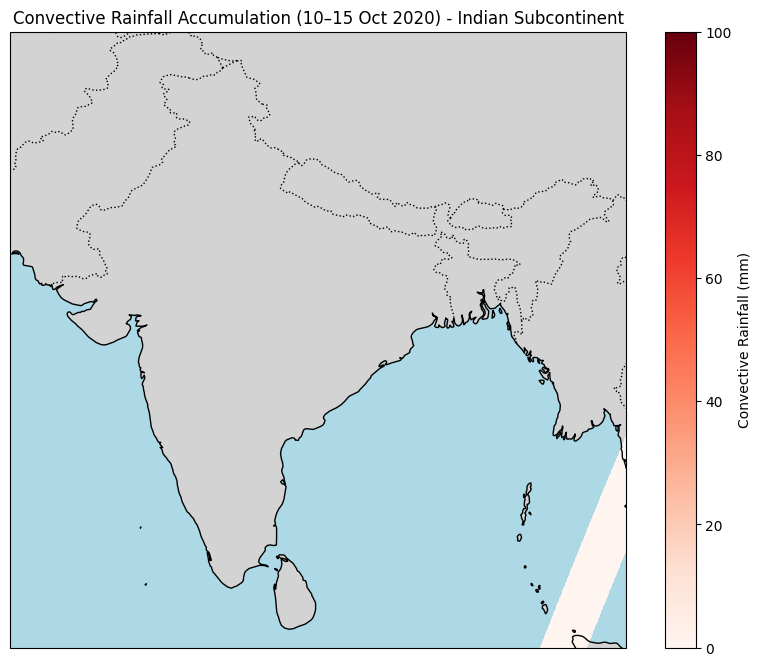

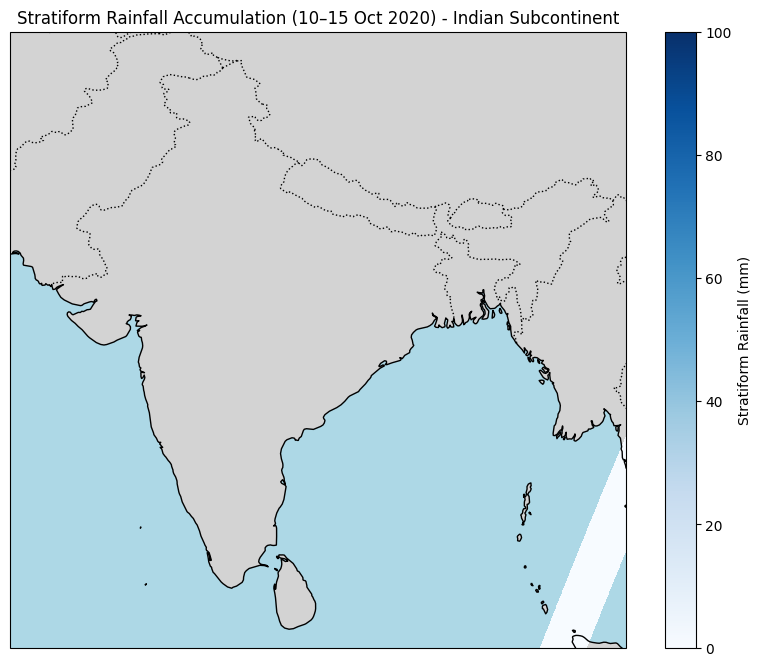

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot convective rainfall
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
mesh = ax.pcolormesh(lon_ref, lat_ref, convective_accum, cmap='Reds', shading='auto', vmin=0, vmax=100)
plt.colorbar(mesh, label='Convective Rainfall (mm)')
plt.title('Convective Rainfall Accumulation (10–15 Oct 2020) - Indian Subcontinent')
plt.show()

# Plot stratiform rainfall
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66, 98, 5, 37], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
mesh = ax.pcolormesh(lon_ref, lat_ref, stratiform_accum, cmap='Blues', shading='auto', vmin=0, vmax=100)
plt.colorbar(mesh, label='Stratiform Rainfall (mm)')
plt.title('Stratiform Rainfall Accumulation (10–15 Oct 2020) - Indian Subcontinent')
plt.show()
